In [3]:
import pandas as pd
import numpy as np
import easygui
import scipy.optimize

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, FuncFormatter

import kin
import trmc

mpl.rc('font',**{'size' : 12})

class exp_formatter(): 
    """used to format exponentials of ticks"""
    def __init__(self,exponent):
        self.exponent = exponent
    
    def format_func(self,value, tick_number):
        return ("{:0=1.0f}").format(value/10**self.exponent)
#         return ("{:0=1.0f}e" + str(self.exponent)).format(value/10**self.exponent)

defaultpath = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel'

labels = {'A': 'Sample A (0.00% Bi)','B': 'Sample B (0.01% Bi)','C': 'Sample C (0.10% Bi)','D': 'Sample D (1.00% Bi)' }

# Fitting of cavity data

(8380000000.0, 8652000000.0)

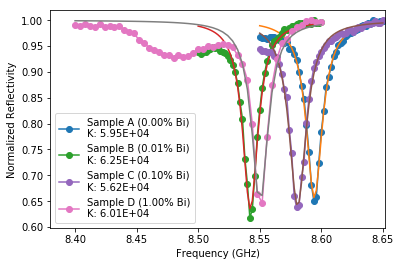

In [4]:
fp_sw_A = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Sweep_exp.csv'
fp_sw_B = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Sweep_exp.csv'
fp_sw_C = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Sweep_exp_fix.csv'
fp_sw_D = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Sweep_exp.csv'

fps = {'A': fp_sw_A,'B': fp_sw_B,'C': fp_sw_C,'D': fp_sw_D }

swps = []
maxV = {}
for samp in fps:
    df = pd.read_csv(fps[samp], index_col = 0)
    swps.append(df['Experimental R'])
    maxV[samp] = df[' Vsignal(V)'].max()

swps = dict(zip(fps.keys(),swps))

back_V_fit = {} #Forgot to copy values sometimes, so using the Vsignal max value and R0 to estimate background voltage
K = {}

fig, ax = plt.subplots(1)
for sample in swps:
    sweep = swps[sample]
    xdata = sweep.index.values
    ydata = sweep.values
    

    p0 =[8.6e9,1e7,.5]
    popt,popc = scipy.optimize.curve_fit(trmc.lor,xdata,ydata, p0 )
    fit_func = trmc.lor(xdata,*popt)

    K[sample] = trmc.calc_K(f0 = popt[0], w = popt[1], R0 = popt[2], printparams = False)
    back_V_fit[sample] = -maxV[sample]*popt[2]
    
    ax.plot(sweep, marker = 'o', label = (labels[sample] + "\nK: " + str("{:0.2E}".format(K[sample]))))
    ax.plot(xdata,fit_func)
    ax.set_xlabel('Frequency (GHz)')
    ax.set_ylabel('Normalized Reflectivity')
ax.legend()
ax.xaxis.get_offset_text().set_visible(False)
ax.set_xlim(8.38e9,8.652e9)

# Pull in and plot trmc data

In [5]:

filepaths_A = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=01_Fluence=6.45E+14_data.csv','C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=02_Fluence=5.121E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=03_Fluence=4.07E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=04_Fluence=3.231E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=05_Fluence=2.567E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=06_Fluence=2.038E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=07_Fluence=1.619E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=08_Fluence=6.45E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=09_Fluence=3.231E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=10_Fluence=6.45E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample A\\Data\\High_Power_Filter=11_Fluence=6.45E+11_data.csv']
filepaths_B = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=01_Fluence=4.573E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=02_Fluence=3.631E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=03_Fluence=2.886E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=04_Fluence=2.291E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=05_Fluence=1.82E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=06_Fluence=1.445E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=07_Fluence=1.148E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=08_Fluence=4.573E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=09_Fluence=2.291E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=10_Fluence=4.573E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=11_Fluence=4.573E+11_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample B\\Data\\High_Power_Filter=12_Fluence=4.573E+10_data.csv']

filepaths_C = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=01_Fluence=4.212E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=02_Fluence=3.344E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=03_Fluence=2.658E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=04_Fluence=2.11E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=05_Fluence=1.676E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=06_Fluence=1.331E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=07_Fluence=1.057E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=08_Fluence=4.212E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=09_Fluence=2.11E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=10_Fluence=4.212E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample C\\Data\\High_Power_Filter=11_Fluence=4.212E+11_data.csv']
#filepaths_D = easygui.fileopenbox(default=defaultpath,multiple=True)
filepaths_D = ['C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=01_Fluence=6.74E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=02_Fluence=5.352E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=03_Fluence=4.253E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=04_Fluence=3.377E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=05_Fluence=2.683E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=06_Fluence=2.13E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=07_Fluence=1.692E+14_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=08_Fluence=6.74E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=09_Fluence=3.377E+13_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=10_Fluence=6.74E+12_data.csv', 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\Gratzel\\Sample D\\Data\\High_Power_Filter=11_Fluence=6.74E+11_data.csv']

fps = {'A':filepaths_A,'B': filepaths_B,'C': filepaths_C,'D': filepaths_D }

In [6]:
dfs_V = {}

for samp in fps:
    dfs_V[samp], back_V_csv = trmc.load(fps[samp], offsettime = 50e-9, sub_lowpow = True) 
    dfs_V[samp] = trmc.offsettime(dfs_V[samp])

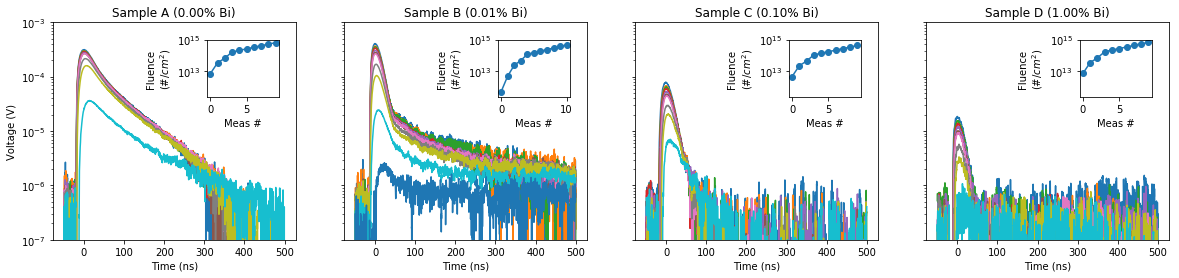

In [7]:
fig, axes = plt.subplots(1,4, sharey = True, figsize = (20,4))

insets = [0,0,0,0]

for i, sample in enumerate(dfs_V):
    axes[i].plot(dfs_V[sample])
    axes[i].set_title(labels[sample])
    
    left, bottom, width, height = [0.03+ 0.202*(i+1), 0.62, 0.05, 0.2]
    insets[i] = fig.add_axes([left, bottom, width, height])
    insets[i].plot(np.flip(dfs_V[sample].columns,0), marker = 'o')
    insets[i].set_ylim(2e11,1e15)
    insets[i].set_yscale('log')
    insets[i].set_ylabel('Fluence\n$(\#/cm^2)$ ')
    insets[i].set_xlabel('Meas #')

axes[0].set_yscale('log')
axes[0].set_ylim(1e-7,1e-3)
axes[0].set_ylabel('Voltage (V)')

for ax in axes:
    ax.set_xlabel('Time (ns)')
    expf = exp_formatter(-9)
    ax.xaxis.set_major_formatter(FuncFormatter(expf.format_func))
    ax.xaxis.get_offset_text().set_visible(False)

In [9]:
dfs_cond = {}

for samp in fps:
    print('Back V of ', samp, ": " ,back_V_fit[samp])
    print('K of ', samp, ": " ,K[samp])
    dfs_cond[samp] = trmc.convert_V2cond(dfs_V[samp],back_V_fit[samp],K[samp])

Back V of  A :  -0.2206719345459481
K of  A :  59467.94508535763
Back V of  B :  -0.2097462431368843
K of  B :  62484.00808467879
Back V of  C :  -0.21173269628509972
K of  C :  56198.34749360755
Back V of  D :  -0.2051534190461178
K of  D :  60096.18973740449


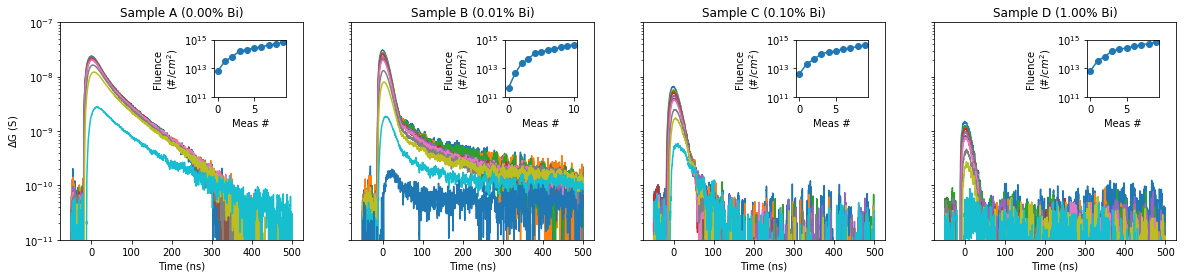

In [10]:
fig, axes = plt.subplots(1,4, sharey = True, figsize = (20,4))

for i, sample in enumerate(dfs_cond):
    axes[i].plot(dfs_cond[sample])
    axes[i].set_title(labels[sample])
    
    left, bottom, width, height = [0.03+ 0.202*(i+1), 0.62, 0.05, 0.2]
    insets[i] = fig.add_axes([left, bottom, width, height])
    insets[i].plot(np.flip(dfs_V[sample].columns,0), marker = 'o')
    insets[i].set_ylim(1e11,1e15)
    insets[i].set_yscale('log')
    insets[i].set_ylabel('Fluence\n$(\#/cm^2)$ ')
    insets[i].set_xlabel('Meas #')

axes[0].set_yscale('log')
axes[0].set_ylim(1e-11,1e-7)
axes[0].set_ylabel('$\Delta$G (S)')


for ax in axes:
    ax.set_xlabel('Time (ns)')
    expf = exp_formatter(-9)
    ax.xaxis.set_major_formatter(FuncFormatter(expf.format_func))
    ax.xaxis.get_offset_text().set_visible(False)

# Pull in and plot transmission data

In [8]:
# filepath = easygui.fileopenbox(default=defaultpath)
fp_quartz = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\Quartz_4mm_newbaseline.txt'
quartz = pd.read_csv(fp_quartz, skiprows = 2,index_col = 0, squeeze=True)/100

# fp_data = easygui.fileopenbox(default=defaultpath)
fp_T_A = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleA_remres.txt'
fp_T_B = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleB_remres.txt'
fp_T_C = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleC_remres.txt'
fp_T_D = 'C:\\Users\\aspit\\OneDrive\\Data\\TRMC\\20181025\\SampleD_remres.txt'

fps = {'A': fp_T_A,'B': fp_T_B,'C': fp_T_C,'D': fp_T_D }

T = pd.DataFrame(columns = fps.keys())
for samp in fps:
    T[samp] = pd.read_csv(fps[samp], skiprows = 2,index_col = 0,squeeze = True)/100

Transmittance  A :  0.0011553442925991944
Transmittance  B :  0.12155322286041241
Transmittance  C :  0.0014414295460047093
Transmittance  D :  0.011454413415197727


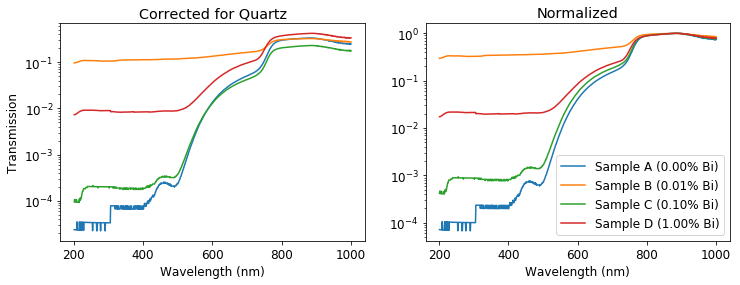

In [36]:
#Correct for quartz
T_corr = T.copy()
for samp in T_corr:
    T_corr[samp] = T[samp]/quartz
    
#normalize to maximum value    
T_norm = T_corr.copy()
for samp in T_norm:
    T_norm[samp] = T_corr[samp]/T_norm[samp].max()

fig, axes = plt.subplots(1,2, figsize = (12,4))

for samp in T.columns:
#     axes[0].plot(T[samp], label = samp)
    axes[0].plot(T_corr[samp], label = labels[samp])
    axes[1].plot(T_norm[samp], label = labels[samp])
    print("Transmittance ", samp, ': ', str(T_corr[samp][532.0]))

# axes[0].plot(quartz, label = 'Quartz')
# axes[0].set_title('Raw Data')
axes[0].set_title('Corrected for Quartz')
axes[1].set_title('Normalized')

axes[0].set_ylabel('Transmission')
axes[1].legend()

for ax in axes:
    ax.set_xlabel('Wavelength (nm)')
    ax.set_yscale('log')

Absorbance  A :  0.9988446557074008
Absorbance  B :  0.8784467771395876
Absorbance  C :  0.9985585704539953
Absorbance  D :  0.9885455865848023


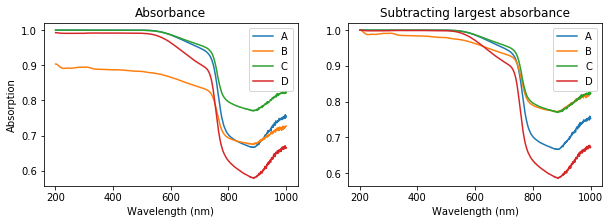

In [10]:
#Absorbance
A = T_corr.copy()
for samp in T_corr:
    A[samp] = 1-T_corr[samp]
    
#subtraced absorbance
A_sub = A.copy()
for samp in A:
    A_sub[samp] = A[samp]-(A[samp].max()-1)


fig, axes = plt.subplots(1,2, figsize = (10,3))

FAs = {}

for samp in T.columns:
    axes[0].plot(A[samp], label = samp)
    axes[1].plot(A_sub[samp], label = samp)
    FAs[samp] = A[samp][532.0]
    print("Absorbance ", samp, ': ', str(FAs[samp]))

# axes[0].plot(quartz, label = 'Quartz')
axes[0].set_title('Absorbance')
axes[1].set_title('Subtracting largest absorbance')
# axes[2].set_title('Corrected and Normalized to max')
    
axes[0].set_ylabel('Absorption')
for ax in axes:
    ax.set_xlabel('Wavelength (nm)')
    ax.legend()
#     ax.set_yscale('log')

# calculate figure of merit

In [96]:
params = {
    'beta' : 2.25
}

cav_A = 22.86*10.16 ##mm^2

masking = {'A': 50/cav_A,'B': 89/cav_A,'C': 70/cav_A,'D': 35/cav_A}


print('Masking factors: ',masking)
print('Fractional Absorbance: ',FAs)

Masking factors:  {'A': 0.21527820833419445, 'B': 0.38319521083486613, 'C': 0.3013894916678722, 'D': 0.1506947458339361}
Fractional Absorbance:  {'A': 0.9988446557074008, 'B': 0.8784467771395876, 'C': 0.9985585704539953, 'D': 0.9885455865848023}


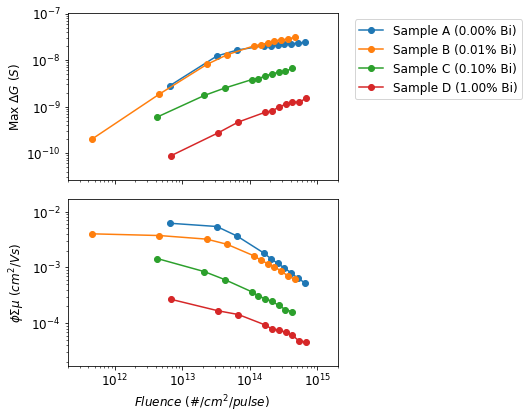

In [41]:
fig, axes = plt.subplots(2,1, sharex = True, figsize = (5,6))

for i,sample in enumerate(dfs_cond):
    df = dfs_cond[sample]
    params['M'] = masking[sample]
    params['FA'] = FAs[sample]
    maxG, fom = trmc.maxG_and_fom(df,params)
    
    axes[0].plot(maxG,marker = 'o', label = labels[sample])    
    axes[1].plot(fom,marker = 'o', label = labels[sample])

axes[0].set_ylabel('Max $\Delta G \ (S)$')
axes[1].set_xlim(2e11,2e15)
axes[1].set_ylabel('$\phi\Sigma\mu \ (cm^2/Vs)$')
axes[1].set_xlabel('$Fluence \ (\#/cm^2/pulse)$ ')
axes[0].legend(bbox_to_anchor=(1.04,1), loc="upper left")

for ax in axes:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.margins(0.2)
    
fig.tight_layout()

# kinetic modeling

In [42]:
params_model = {
    'FWHM':5e-9, #ns
    't0': 0e-9,
    'FA': 0.9,
    'd':1e-5 #cm-2
}

dt = 0.1e-9
t = np.arange(0e-9,800e-9,dt)

# k1 = 1.5e7
# k2 = 6e-11 
# k3 = 1.6e-28

ks = {
    'A': {'k1': 1.2e7, 'k2':6e-13, 'k3': 0 },
    'B': {'k1': 1.2e7, 'k2':6e-12, 'k3': 0 },
    'C': {'k1': 1.5e7, 'k2':6e-13, 'k3': 0 },
    'D': {'k1': 1.5e7, 'k2':6e-13, 'k3': 0 }
}

In [44]:
n = {}
for sample in dfs_cond:
    I0 = dfs_cond[sample].columns[0]
    power, dng = kin.calc_pow(t,I0,params_model)
    n[sample] = kin.calc_n(dng,**ks[sample])

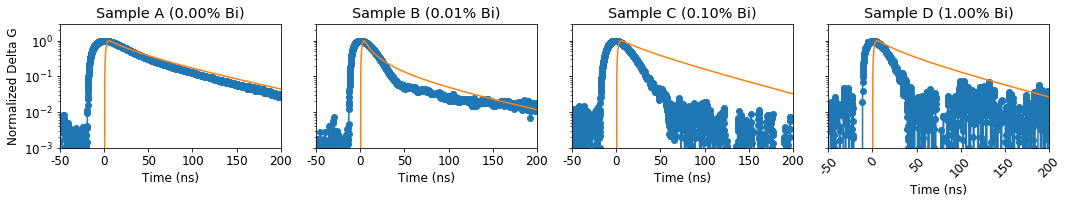

In [53]:
fig, axes = plt.subplots(1,4, figsize = (15,3), sharey = True)


for i, sample in enumerate(n):
    df = dfs_cond[sample]
    df = df/df.max()
    c_exp = df[df.columns[0]]
    c = n[sample]*(c_exp.max()/n[sample].max()) 
    
    ax = axes[i]
    ax.plot(c_exp, marker = 'o')
    ax.plot(c)
    
    plt.xticks(rotation=45)
    ax.set_xlim(-50e-9,.2e-6)
    ax.set_xlabel('Time (ns)')
    expf = exp_formatter(-9)
    ax.xaxis.set_major_formatter(FuncFormatter(expf.format_func))
    ax.xaxis.get_offset_text().set_visible(False)
    ax.set_title(labels[sample])
    
axes[0].set_yscale('log')
axes[0].set_ylabel('Normalized Delta G')
axes[0].set_ylim(1e-3,3) 
fig.tight_layout()

In [54]:
k1 = 1e7
k2 = 1e-10 
k3 = 1.6e-28

params['FA'] = FAs['A']
params['M'] = masking['A']

maxG, fom = trmc.maxG_and_fom(dfs_cond['A'],params)

fluences = np.flip(fom.index,0)

n_max = np.zeros(len(fluences))
n_0max = np.zeros(len(fluences))

for i, fluence in enumerate(fluences):
    print('calculating n for fluence: ', fluence)
    power,dng = kin.calc_pow(t,fluence,params_model)
    n = kin.calc_n(dng,k1,k2,k3)
    n_max[i] = n.max()
    n_0max[i] = np.trapz(dng,dng.index)
    
R = pd.Series(n_max/n_0max,index = fluences)
R = R*(fom.max()/R.max())

calculating n for fluence:  6450000000000.0
calculating n for fluence:  32310000000000.0
calculating n for fluence:  64500000000000.0
calculating n for fluence:  161900000000000.0
calculating n for fluence:  203800000000000.0
calculating n for fluence:  256700000000000.0
calculating n for fluence:  323100000000000.0
calculating n for fluence:  407000000000000.0
calculating n for fluence:  512100000000000.0
calculating n for fluence:  645000000000000.0


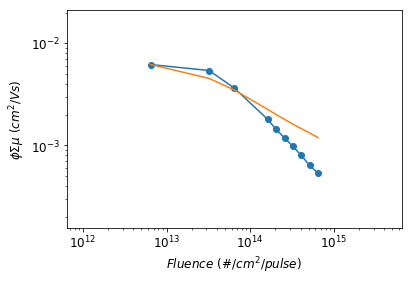

In [55]:
fig, ax = plt.subplots(1)

ax.plot(fom,marker = 'o')
ax.plot(R)
ax.set_ylabel('$\phi\Sigma\mu \ (cm^2/Vs)$')
ax.set_xlabel('$Fluence \ (\#/cm^2/pulse)$ ')

ax.set_yscale('log')
ax.set_xscale('log')
ax.margins(0.5)